# EDA Para el Archivo Que Se Utilizara En El Modelo De Machine Learnig

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from scipy.spatial import distance

In [2]:
# Importar archivo para trabajar
df = pd.read_csv('data_a_explorar/ML_data.csv', error_bad_lines=False)

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_11952\4187509191.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data_a_explorar/ML_data.csv', error_bad_lines=False)


In [3]:
df.head()

,id,title,genero,popularity
0,862,Toy Story,Animation Comedy Family,21.95
1,8844,Jumanji,Adventure Fantasy Family,17.02
2,15602,Grumpier Old Men,Romance Comedy,11.71
3,31357,Waiting to Exhale,Comedy Drama Romance,3.86
4,11862,Father of the Bride Part II,Comedy,8.39


Estadísticas descriptivas: Calcula estadísticas básicas como media, mediana, desviación estándar, mínimo, máximo, etc.

In [4]:
# Estadísticas descriptivas de la columna de popularity
print(df['popularity'].describe())


count    45343.000000
mean         2.926141
std          6.011114
min          0.000000
25%          0.390000
50%          1.130000
75%          3.690000
max        547.490000
Name: popularity, dtype: float64


### Distribucion de los datos de Popularidad

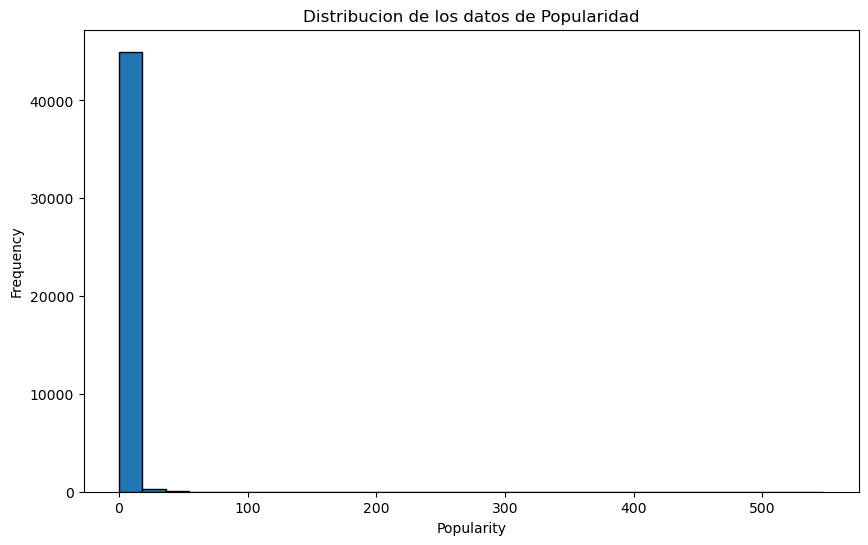

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df["popularity"], bins=30, edgecolor="k")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.title("Distribucion de los datos de Popularidad")
plt.show()

### Numero de Peliculas por Genero

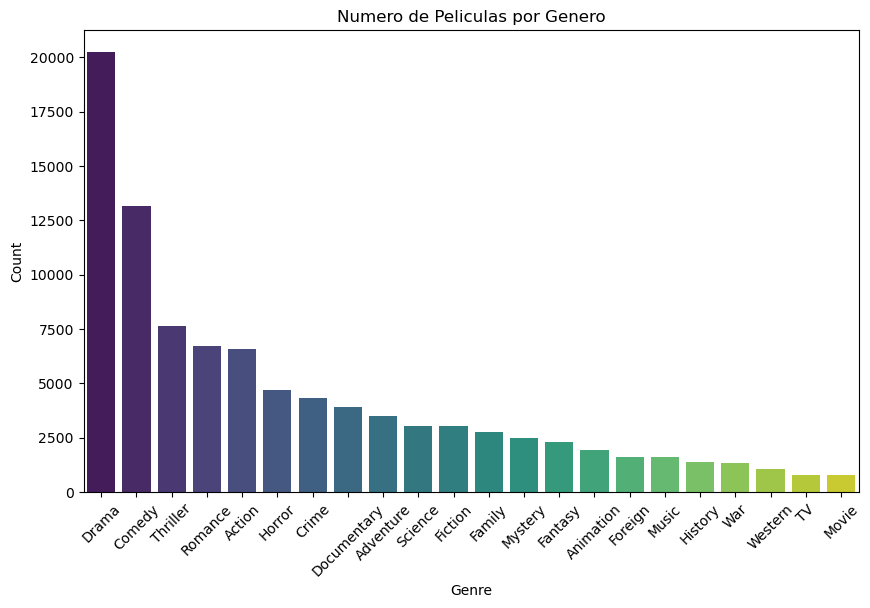

In [6]:
plt.figure(figsize=(10, 6))
genre_counts = df["genero"].str.split().explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Numero de Peliculas por Genero")
plt.xticks(rotation=45)
plt.show()

### Palabras más comunes en los títulos de las películas

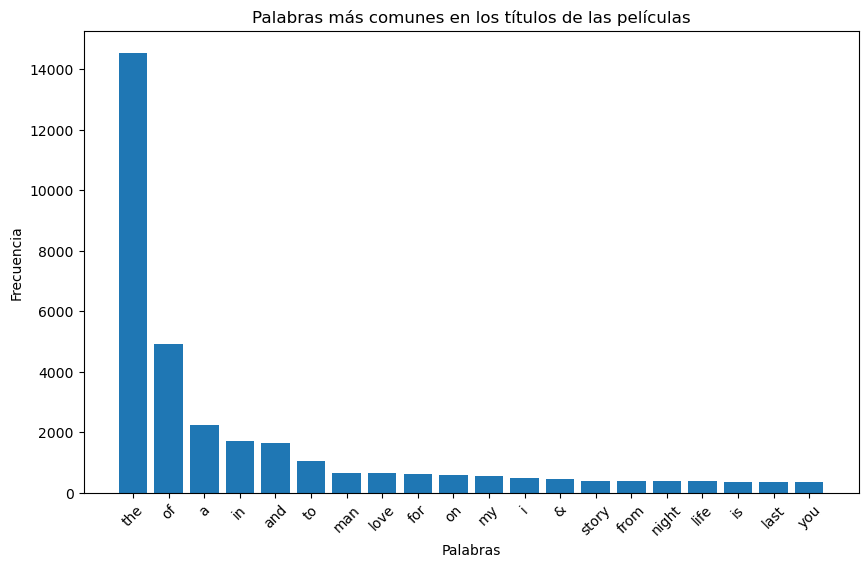

In [7]:
# Obtener una lista de palabras en los títulos de las películas
title_words = " ".join(df["title"].astype(str)).lower().split()

# Calcular la frecuencia de las palabras
word_counts = Counter(title_words)

# Obtener las palabras y sus frecuencias más comunes
common_words = word_counts.most_common(20)
words, frequencies = zip(*common_words)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más comunes en los títulos de las películas")
plt.xticks(rotation=45)
plt.show()

### Distribución de Géneros de Películas

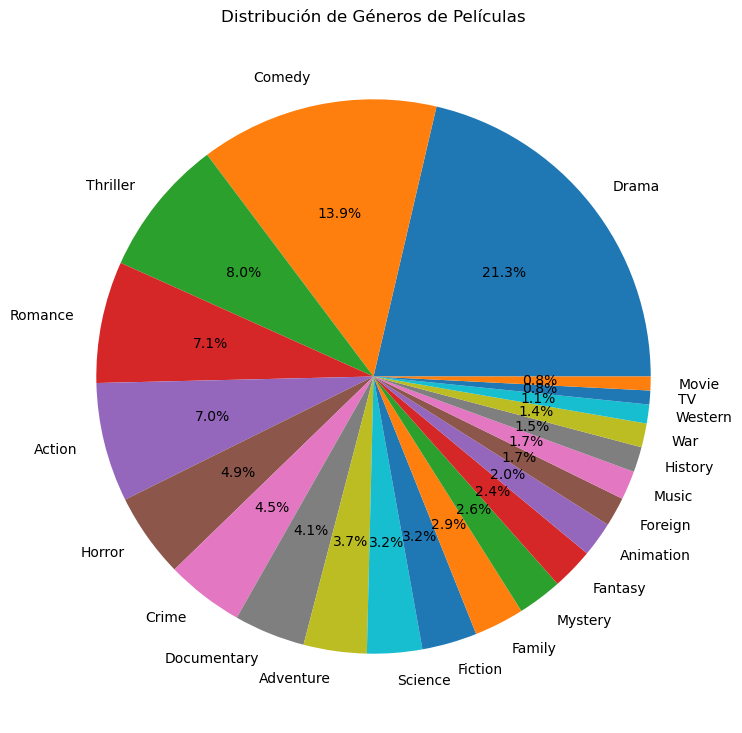

In [20]:
genre_counts = df["genero"].str.split().explode().value_counts()

plt.figure(figsize=(15, 9))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%")
plt.title("Distribución de Géneros de Películas")
plt.show()

### Lista de Palabras en los Títulos de las Películas

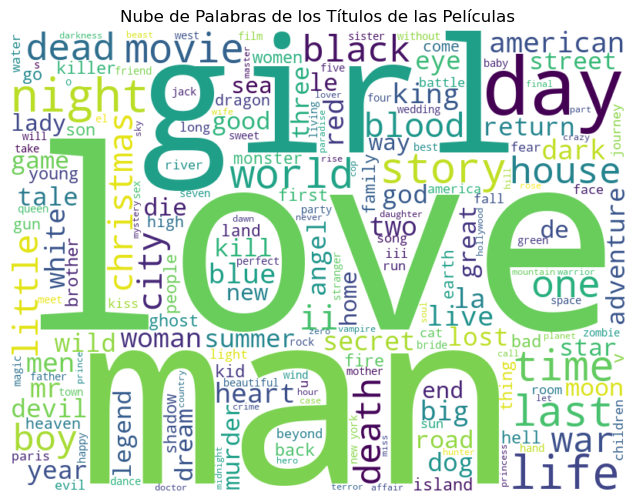

In [9]:
# Obtener una lista de palabras en los títulos de las películas
title_words = " ".join(df["title"].astype(str)).lower()

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(title_words)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de los Títulos de las Películas")
plt.show()



### Matriz de Distancias

In [11]:
# Definir el tamaño de la muestra de la matriz de distancias
sample_size = 100

# Obtener una muestra aleatoria de películas
sample_movies = df.sample(n=sample_size, random_state=42)

# Crear una matriz de popularidad para la muestra
popularity_matrix = sample_movies["popularity"].values.reshape(-1, 1)

# Calcular la matriz de distancias euclidianas para la muestra
euclidean_distances = distance.cdist(popularity_matrix, popularity_matrix, metric='euclidean')

# Mostrar la matriz euclidiana en forma de tabla
movie_ids = sample_movies["id"].values
euclidean_table = pd.DataFrame(euclidean_distances, index=movie_ids, columns=movie_ids)
print(euclidean_table)

        43942   30139   73919   19025   127856  60629   24008   407588  \
43942     0.00    2.87    5.89    5.04    5.92    6.00    0.99    5.50   
30139     2.87    0.00    8.76    7.91    8.79    8.87    3.86    8.37   
73919     5.89    8.76    0.00    0.85    0.03    0.11    4.90    0.39   
19025     5.04    7.91    0.85    0.00    0.88    0.96    4.05    0.46   
127856    5.92    8.79    0.03    0.88    0.00    0.08    4.93    0.42   
...        ...     ...     ...     ...     ...     ...     ...     ...   
38404     5.82    8.69    0.07    0.78    0.10    0.18    4.83    0.32   
152618    7.91    5.04   13.80   12.95   13.83   13.91    8.90   13.41   
328796    4.99    7.86    0.90    0.05    0.93    1.01    4.00    0.51   
13923     5.14    8.01    0.75    0.10    0.78    0.86    4.15    0.36   
142746    5.61    8.48    0.28    0.57    0.31    0.39    4.62    0.11   

        239523  137174  ...  240916  16702   239536  73661   114577  38404   \
43942     5.50    3.18  ...    3

###  Matriz de Distancias Euclidianas en Forma de Mapa de Calor

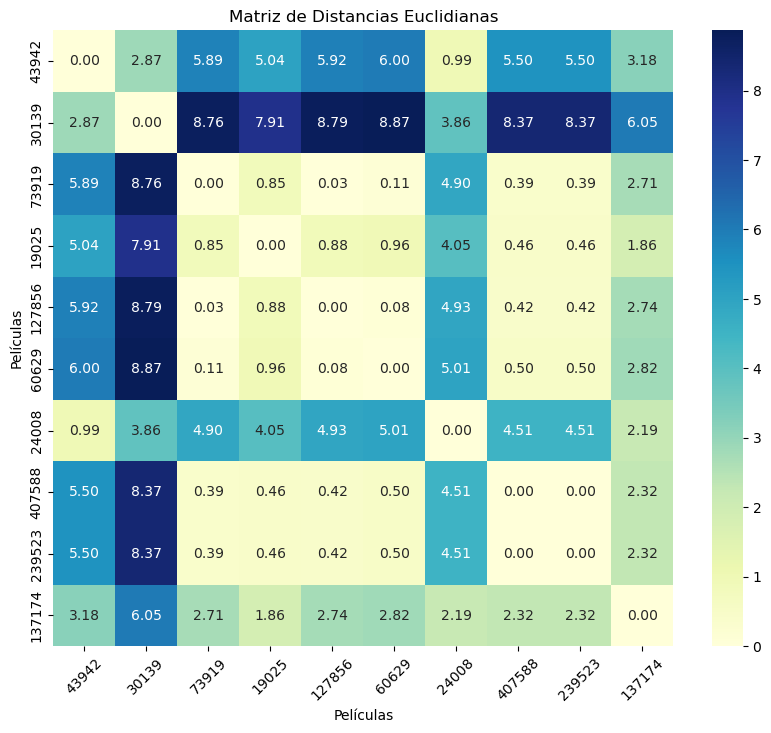

In [19]:
# Definir el tamaño de la muestra de la matriz de distancias
sample_size = min(10, len(df))

# Obtener una muestra aleatoria de películas
sample_movies = df.sample(n=sample_size, random_state=42)

# Crear una matriz de popularidad para la muestra
popularity_matrix = sample_movies["popularity"].values.reshape(-1, 1)

# Calcular la matriz de distancias euclidianas para la muestra
euclidean_distances = distance.cdist(popularity_matrix, popularity_matrix, metric='euclidean')

# Mostrar la matriz euclidiana en forma de tabla
movie_ids = sample_movies["id"].values
euclidean_table = pd.DataFrame(euclidean_distances, index=movie_ids, columns=movie_ids)

# Crear la figura y el eje del gráfico
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Crear el mapa de calor utilizando seaborn
sns.heatmap(euclidean_table, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True, ax=ax)
ax.set_xlabel("Películas")
ax.set_ylabel("Películas")
ax.set_title("Matriz de Distancias Euclidianas")

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

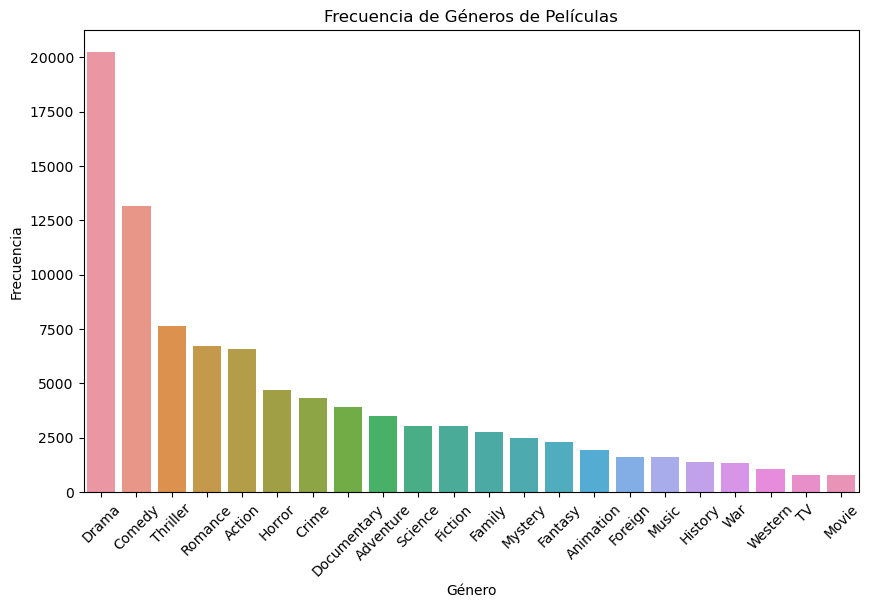

In [21]:
plt.figure(figsize=(10, 6))
genre_counts = df["genero"].str.split().explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Géneros de Películas")
plt.xticks(rotation=45)
plt.show()

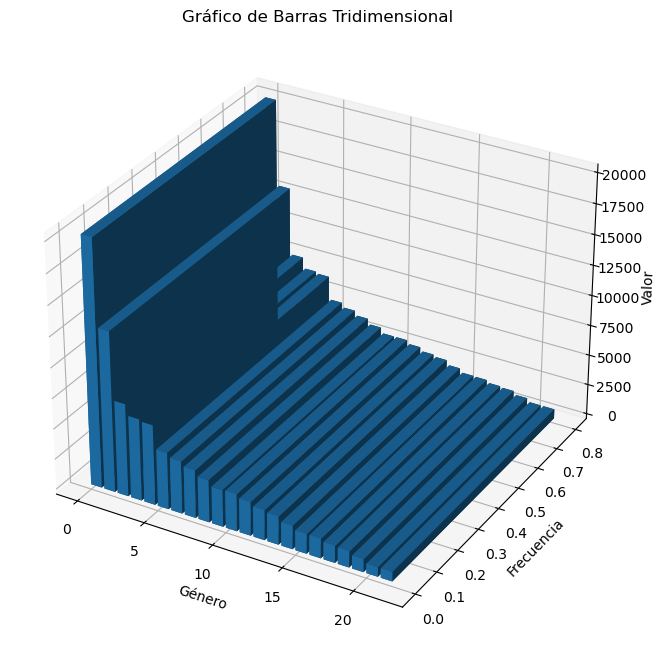

In [26]:
genre_counts = df["genero"].str.split().explode().value_counts()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xpos = np.arange(len(genre_counts))
ypos = np.zeros(len(genre_counts))
zpos = np.zeros(len(genre_counts))
dx = dy = 0.8
dz = genre_counts.values

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xlabel('Género')
ax.set_ylabel('Frecuencia')
ax.set_zlabel('Valor')

plt.title('Gráfico de Barras Tridimensional')

plt.show()